In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import os
import re

In [51]:
read_path = '/home/xj2173/vast/diffeo/process_data/all_cnn_layers/inv_cos_sim_extended/'

In [91]:
data_dir_list = [s for s in os.listdir(read_path) if 'cosine' in s][15:]
data_dir_list.sort()
data_dir_list

['cosine_similarity_layer-29.pt',
 'cosine_similarity_layer-30.pt',
 'cosine_similarity_layer-31.pt',
 'cosine_similarity_layer-32.pt',
 'cosine_similarity_layer-33.pt',
 'cosine_similarity_layer-34.pt',
 'cosine_similarity_layer-35.pt',
 'cosine_similarity_layer-36.pt',
 'cosine_similarity_layer-37.pt',
 'cosine_similarity_layer-38.pt',
 'cosine_similarity_layer-39.pt',
 'cosine_similarity_layer-40.pt',
 'cosine_similarity_layer-41.pt',
 'cosine_similarity_layer-42.pt',
 'cosine_similarity_layer-43.pt']

In [92]:
curves = {}
error = {}
for dir in data_dir_list:
  data = torch.load(read_path + dir, map_location = torch.device('cpu'))
  curves[dir] = torch.mean(data, dim = (0, -1))
  error[dir] = (torch.std(data, dim = (0, -1)))

In [93]:
diffeo_amp = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

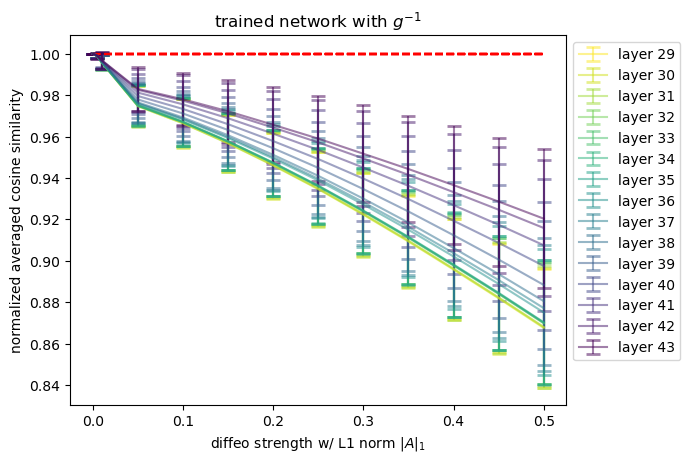

In [94]:
plt.figure()

colors = plt.cm.viridis_r(np.linspace(0,1,len(curves)))

for i, key in enumerate(curves.keys()):
    layer_num = int(re.findall(r'\d+', key)[0])
    plt.errorbar(diffeo_amp, curves[key], error[key], color=colors[i], label = f'layer {layer_num}', alpha = 0.5, capsize= 5, capthick= 2)
    plt.hlines(y = 1, xmin = 0, xmax = 0.5, color = 'r', linestyle = '--')
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel(r'diffeo strength w/ L1 norm $|A|_1$')
    plt.title(r'trained network with $g^{-1}$')
    plt.ylabel(r'normalized averaged cosine similarity')